In [ ]:
!pip install deap

     |████████████████████████████████| 160 kB 4.4 MB/s 


In [ ]:
from deap import base
from deap import creator
from deap import tools
import random
import matplotlib.pyplot as plt
from deap import base, algorithms
import numpy as np
import time
from datetime import datetime
import pandas as pd
plt.style.use('fivethirtyeight')
import math
pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
int(str(11111111), 2)

255

In [ ]:
# константы задачи
ONE_MAX_LENGTH = 2   # длина подлежащей оптимизации битовой строки
 
# константы генетического алгоритма
POPULATION_SIZE = 120   # количество индивидуумов в популяции
P_CROSSOVER = 0.9      # вероятность скрещивания
P_MUTATION = 0.1       # вероятность мутации индивидуума
MAX_GENERATIONS = 7    # максимальное количество поколений

RANDOM_SEED = 7
random.seed(RANDOM_SEED)
FILE_NAME = 'YNDX_190101_190331.csv'

In [ ]:
def SMA(data, period = 30, column='<CLOSE>'):
  return data[column].rolling(window=period).mean()

In [ ]:
def SMA_fun(data, params):
  Profit = 0
  Loss = 0
  #Q = math.ceil(150 * int(str(params[:int(ONE_MAX_LENGTH/2)])[1:-1].replace(", ", ""), 2) / 255)
  #S = Q + math.ceil((150-Q) * int(str(params[int(ONE_MAX_LENGTH/2):])[1:-1].replace(", ", ""), 2) / 255)
  Q = params[0]
  S = Q + math.ceil((150 - Q)*params[1] / 150)
  data['SMA_Q'] = SMA(data, Q)
  data['SMA_S'] = SMA(data, S)
  data['Signal'] = np.where(data['SMA_Q'] > data['SMA_S'], 1, 0)
  data['Position'] = data['Signal'].diff()
  data['Buy'] = np.where(data['Position'] == 1, data['<CLOSE>'], -1)
  df_new = data[['<LOW>', '<HIGH>', 'Buy']]
  BuyList = df_new[data['Buy'] != -1]
  LIST = list(BuyList.index)
  for i in LIST:
    a = BuyList.loc[i]['Buy']
    TakeProfit = df_new['<HIGH>'] / a >= 1.01
    StopLoss = df_new['<LOW>'] / a <= 0.99
    df_new['Result'] = 2 * TakeProfit - 1 * StopLoss
    B1 = np.trim_zeros(df_new.loc[i:]['Result'])
    #print(B1)
    if len(B1) != 0:
      if B1[0] > 0:
        Profit += 1
      else:
        Loss += 1
  print(Profit - Loss, Q, S)
  return (Profit - Loss)

In [ ]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
def oneMaxFitness(individual):
    ans = SMA_fun(df, individual)
    return ans,

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [ ]:
df = pd.read_csv(FILE_NAME)
df = df.set_index(pd.DatetimeIndex(df['<DATE>'].values + ' ' + df['<TIME>'].values))

In [ ]:
toolbox = base.Toolbox()
toolbox.register("zeroOrOne", random.randint, 1, 151)
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, ONE_MAX_LENGTH)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

population = toolbox.populationCreator(n=POPULATION_SIZE)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/ONE_MAX_LENGTH)
toolbox.register("evaluate", oneMaxFitness)

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", np.max)
stats.register("avg", np.mean)

In [ ]:
start_time = datetime.now()
population, logbook = algorithms.eaSimple(population, toolbox,
                                        cxpb=P_CROSSOVER,
                                        mutpb=P_MUTATION,
                                        ngen=MAX_GENERATIONS,
                                        stats=stats,
                                        verbose=True)
maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")
print(datetime.now() - start_time)

13 83 101
18 102 107
19 19 140
-2 25 104
0 150 150
4 130 138
7 10 32
13 112 140
11 18 73
6 24 144
12 109 114
-8 145 147
7 58 150
-3 16 149
0 150 150
10 13 66
10 12 144
11 35 93
9 108 119
-2 139 142
-3 147 149
-3 144 146
13 27 150
27 147 148
17 96 105
-2 141 143
21 145 146
7 53 136
0 137 147
17 81 137
0 150 150
11 93 123
25 64 91
21 63 76
4 148 150
-11 135 148
7 88 136
13 74 84
1 31 136
14 108 121
17 88 105
-1 126 144
-19 11 30
8 143 150
11 81 122
9 90 142
34 149 150
13 18 40
14 70 136
4 17 32
15 80 150
10 115 133
19 99 130
-11 6 121
17 91 109
11 30 132
21 16 67
22 74 92
11 64 123
4 101 143
14 21 58
9 115 140
-13 141 146
11 36 121
-13 141 146
11 107 134
13 98 119
16 39 56
14 46 74
11 60 96
22 4 126
0 151 151
14 68 108
23 2 40
2 108 147
11 95 149
11 82 97
7 132 134
13 117 149
12 101 135
10 103 135
7 27 129
7 103 109
7 49 62
8 54 127
24 42 63
20 88 94
35 27 28
-3 146 148
4 138 141
44 94 97
11 19 67
0 97 111
6 65 116
3 94 140
17 32 56
2 125 145
7 123 146
13 80 91
23 37 58
16 88 117
0 123 1

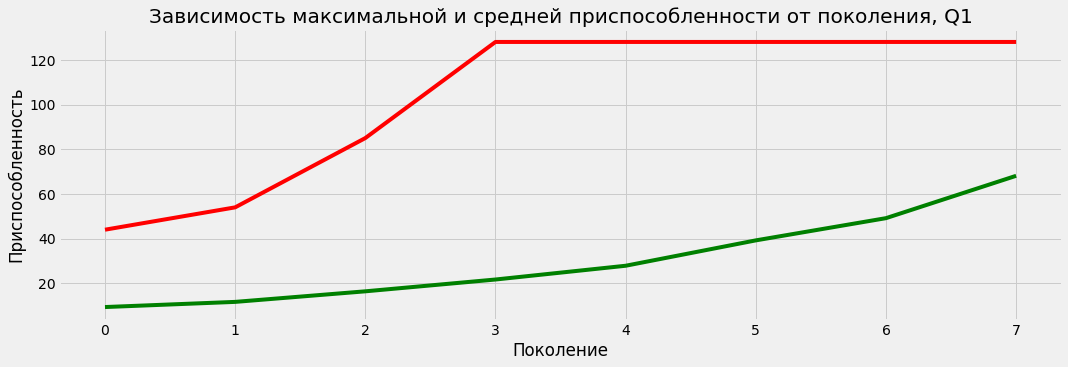

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Поколение')
plt.ylabel('Приспособленность')
plt.title('Зависимость максимальной и средней приспособленности от поколения, Q1')
plt.show()